In [2]:
%matplotlib inline
import matplotlib.pyplot as plt
import matplotlib.patches as patches
plt.style.use('seaborn-whitegrid')
import seaborn as sns; sns.set(color_codes=True)
import numpy as np
import pandas
import glob
from collections import Counter

## Plot allele balance to check parsing of VCF file is working

In [3]:
def plot_ab(file_name):
    gm_fh=open(file_name)
    #parse files
    tsv = []
    for line in gm_fh:
        sline=line.strip().split()
        if not sline[0].startswith("#"):
            tsv.append(sline)
            
    #parse allele frequencies
    #freqs=[]
    AO=[]
    RO=[]
    AB=[]
    for line in tsv:
        sline=line[7].split(';')
        #freqs.append(sline[0].split('=')[1])
        AO.append(sline[5].split('=')[1])
        RO.append(sline[28].split('=')[1])
        freq=sline[0].split('=')[1]
        for value in freq.split(','):
            if float(value) > 0:
                AB.append(float(value))
    plt.hist(AB, bins=100, rwidth=1.0, linewidth=0)
    plt.show()

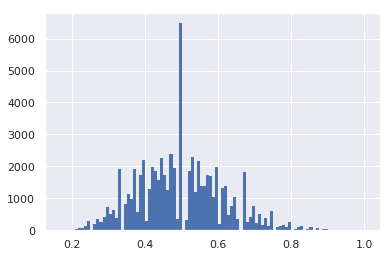

In [73]:
plot_ab("/data8/Human/FungiPaper/comparative_genomics/alignmentToReference/Quatro/mapping/vcfs/GCF_000182965.3_ASM18296v3_genomic.fna-vs-SP_CRL_000G1.sorted.bam.bam.rmdup.vcf")

## Plot SNP density of a single C. parapsilosis strain, one chromosome per line

In [5]:
def parse_vcf(file_name):
    sns.set_style('whitegrid')
    gm_fh=open(file_name)
    #parse file
    chrom={}
    for line in gm_fh:
        sline=line.strip().split()
        if not sline[0].startswith("#"):
            sline2=sline[7].split(';')
            #if (int(sline2[7].split('=')[1]) >= 25 and int(sline2[7].split('=')[1]) <= 100):
            if sline[0] in chrom:
                chrom[sline[0]].append(sline)
            else: 
                chrom[sline[0]] = [sline]
    
    return chrom

In [6]:
def plot_stacked_hist_chr_separate(chrom, cur_max):
#parse allele frequencies
    i=1
    plt.subplots(len(chrom), sharex=True, sharey=True)
    for tsv in chrom:
        AO=[]
        RO=[]
        AB=[]
        AF=[]
        homo=[]
        hetero=[]
        for line in chrom[tsv]:

            sline=line[7].split(';')
            AO.append(sline[5].split('=')[1])
            RO.append(sline[28].split('=')[1])
            freq=sline[0].split('=')[1]
            AB.append(float(freq.split(',')[0]))
            if sline[3].split('=')[1].split(',')[0] is '1':
                homo.append(int(line[1]))
            else:   
                hetero.append(int(line[1]))
            AF.append(sline[3].split('=')[1].split(',')[0])
        #skip small chromosomes
        if (max(homo+hetero) > 200000):
            plt.subplot(len(chrom), 1, i)
            #left, width = 0.07, 18*(cur_max/max(homo+hetero))
            #bottom, height = 0.1, .86
            #sizes = plt.axes([left, bottom, width, height])
            plt.hist([homo,hetero], bins=500, stacked=True, rwidth = 1.0, linewidth=0, color = ['red', 'black'])
            plt.xlim(0,cur_max)
            plt.ylim(0,100)
            plt.grid(False)
            i+=1
    #plt.show()

In [7]:
def parse_abs_max(chrom):
    loc = []
    for tsv in chrom:
        for line in chrom[tsv]:
            loc.append(int(line[1]))
    return max(loc)

In [8]:
def per_chrom_freq_average(chrom):
    chroms = {}
    means = []
    loc = []
    lengths = {}
    for tsv in chrom:
        loc = []
        chroms[tsv] = []
        for line in chrom[tsv]:
            sline=line[7].split(';')
            freq=sline[0].split('=')[1]
            if len(freq.split(',')) > 1:
                   freq = freq.split(',')[0]
            if float(freq) > 0.1:
                chroms[tsv].append(float(freq))
            loc.append(int(line[1]))
                       
        lengths[tsv] = max(loc)
            
    for chro in chroms:
        means.append([ np.mean(chroms[chro]), lengths[chro] ])
    
    return means

In [36]:
choano = parse_vcf("/home/pwest/mono_lake/choana_genomes/bins/SNPs/NKKH001C_choano.sam.bam.rmdup.vcf")

In [37]:
means = per_chrom_freq_average(choano)

/home/pwest/.pyenv/versions/3.5.2/lib/python3.5/site-packages/numpy/core/fromnumeric.py:2909: RuntimeWarning: Mean of empty slice.
  out=out, **kwargs)
/home/pwest/.pyenv/versions/3.5.2/lib/python3.5/site-packages/numpy/core/_methods.py:80: RuntimeWarning: invalid value encountered in double_scalars
  ret = ret.dtype.type(ret / rcount)


In [38]:
means2 = np.nan_to_num(means)

In [39]:
df = pandas.DataFrame(means2)

In [43]:
SP_CRL_000G1 = parse_vcf("/data8/Human/FungiPaper/comparative_genomics/alignmentToReference/Quatro/mapping/vcfs/GCF_000182965.3_ASM18296v3_genomic.fna-vs-SP_CRL_000G1.sorted.bam.bam.rmdup.vcf")

In [44]:
cur_max = parse_abs_max(SP_CRL_000G1)

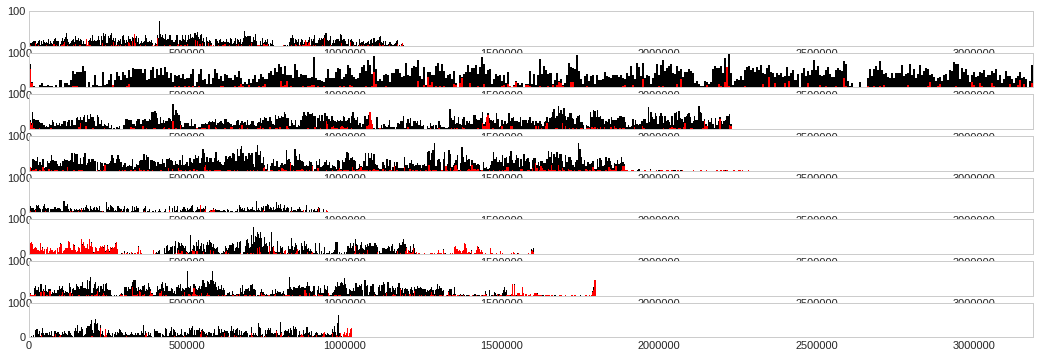

In [77]:
plt.style.use('seaborn-whitegrid')
plot_stacked_hist_chr_separate(SP_CRL_000G1, cur_max)
plt.gcf().set_size_inches(18,6)
plt.show()

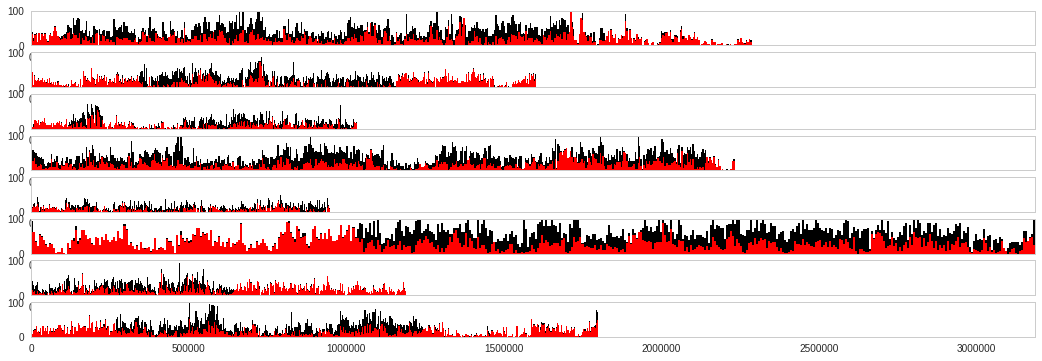

In [31]:
N5_264_006G1 = parse_vcf("/data8/Human/FungiPaper/comparative_genomics/alignmentToReference/Quatro/mapping/vcfs/GCF_000182965.3_ASM18296v3_genomic.fna-vs-N5_264_006G1.sorted.bam.bam.rmdup.vcf")
cur_max = parse_abs_max(N5_264_006G1)
plot_stacked_hist_chr_separate(N5_264_006G1, cur_max)
plt.gcf().set_size_inches(18,6)
plt.show()

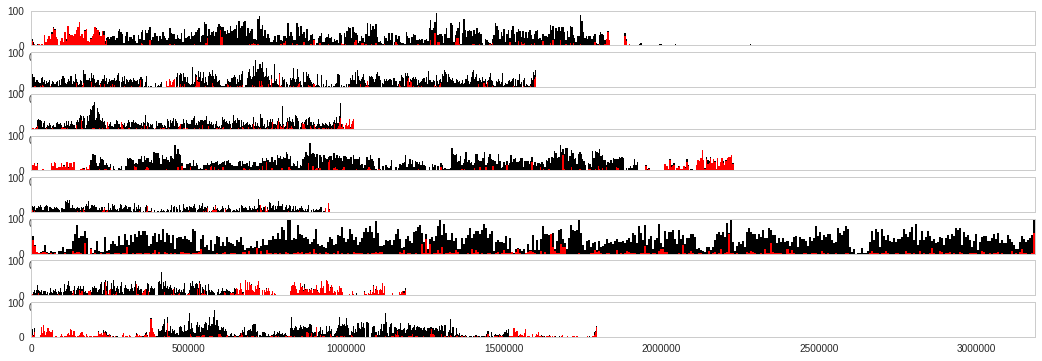

In [30]:
N1_023_000G1 = parse_vcf("/data8/Human/FungiPaper/comparative_genomics/alignmentToReference/Quatro/mapping/vcfs/GCF_000182965.3_ASM18296v3_genomic.fna-vs-N1_023_000G1.sorted.bam.bam.rmdup.vcf")
cur_max = parse_abs_max(N1_023_000G1)
plot_stacked_hist_chr_separate(N1_023_000G1, cur_max)
plt.gcf().set_size_inches(18,6)
plt.show()

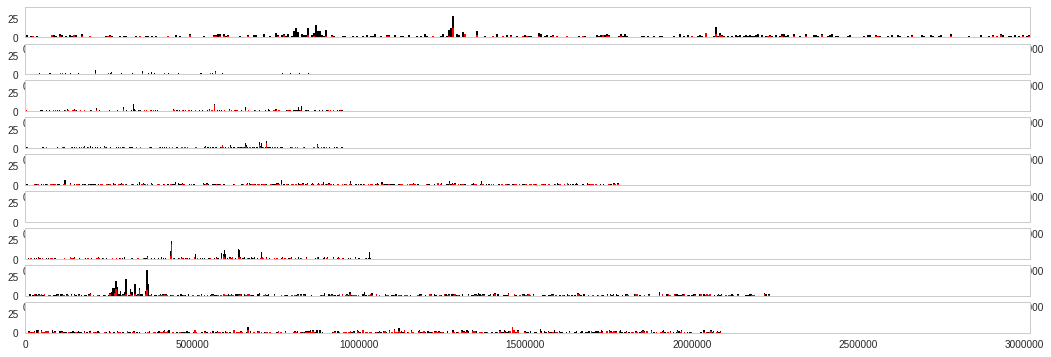

In [37]:
N1_023_000G1 = parse_vcf("/data8/Human/FungiPaper/comparative_genomics/alignmentToReference/Quatro/mapping/vcfs/GCA_000182765.2_ASM18276v2_genomic.fna-vs-S2_005_002R2.sorted.bam.rmdup.vcf")
cur_max = parse_abs_max(N1_023_000G1)
plot_stacked_hist_chr_separate(N1_023_000G1, cur_max)
plt.gcf().set_size_inches(18,6)
plt.show()

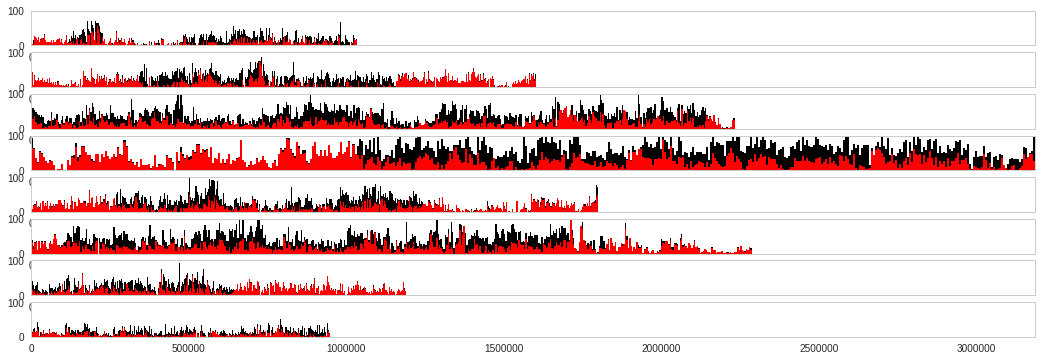

In [17]:
N5_264_006G1 = parse_vcf("/data8/Human/FungiPaper/comparative_genomics/alignmentToReference/Quatro/mapping/vcfs/GCF_000182965.3_ASM18296v3_genomic.fna-vs-N5_264_006G1.sorted.bam.bam.rmdup.vcf")
cur_max = parse_abs_max(N5_264_006G1)
plot_stacked_hist_chr_separate(N5_264_006G1, cur_max)
plt.gcf().set_size_inches(18,6)
plt.show()

## Plot SNP density, one strain per line with chromosome boundaries denoted by dotted lines

In [9]:
def plot_stacked_hist_chr_merged(chrom, ylim):
    going_max = 0
    homo_all = []
    hetero_all = []
    lines = []
    for tsv in chrom:
        AO=[]
        RO=[]
        AB=[]
        AF=[]
        homo=[]
        hetero=[]
        for line in chrom[tsv]:

            sline=line[7].split(';')
            AO.append(sline[5].split('=')[1])
            RO.append(sline[28].split('=')[1])
            freq=sline[0].split('=')[1]
            AB.append(float(freq.split(',')[0]))
            if sline[3].split('=')[1].split(',')[0] is '1':
                homo.append(int(line[1]))
            else:   
                hetero.append(int(line[1]))
            AF.append(sline[3].split('=')[1].split(',')[0])
        #skip small chromosomes
        if (max(homo+hetero) > 100000):
            temp_max = max(homo+hetero)
            homo = [x+going_max for x in homo]
            hetero = [x+going_max for x in hetero]
            homo_all.extend(homo)
            hetero_all.extend(hetero)
            going_max += temp_max
            lines.append(going_max)
    
    plt.figure(num=None, figsize=(18, .65))
    plt.hist([homo_all,hetero_all], bins=1000, stacked=True, color=['red','black'])
    plt.xlim(0,going_max)
    plt.ylim(0,ylim)
    for element in lines:
        plt.axvline(x=element, linestyle=':', color='black')
    plt.grid(False)
    #plt.show()

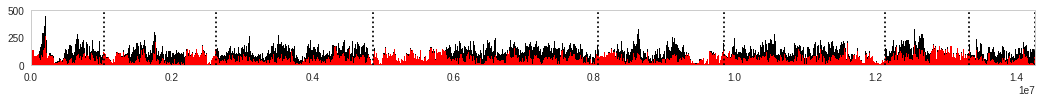

In [65]:
N5_264_006G1 = parse_vcf("/data8/Human/FungiPaper/comparative_genomics/alignmentToReference/Quatro/mapping/vcfs/GCF_000182965.3_ASM18296v3_genomic.fna-vs-N5_264_006G1.sorted.bam.bam.rmdup.vcf")
plot_stacked_hist_chr_merged(N5_264_006G1, 500)

In [10]:
def plot_stacked_hist_chr_merged_sub(chrom, ylim, axes):
    going_max = 0
    homo_all = []
    hetero_all = []
    lines = []
    for tsv in chrom:
        homo=[]
        hetero=[]
        for line in chrom[tsv]:

            sline=line[7].split(';')
            freq=sline[0].split('=')[1]
            if sline[3].split('=')[1].split(',')[0] is '1':
                homo.append(int(line[1]))
            else:   
                hetero.append(int(line[1]))
        #skip small chromosomes
        if (max(homo+hetero) > 100000):
            temp_max = max(homo+hetero)
            homo = [x+going_max for x in homo]
            hetero = [x+going_max for x in hetero]
            homo_all.extend(homo)
            hetero_all.extend(hetero)
            going_max += temp_max
            lines.append(going_max)
    
    #plt.figure(num=None, figsize=(18, 1))
    axes.hist([homo_all,hetero_all], bins=1000, stacked=True, rwidth=1.0, linewidth=0, color = ['red', 'black'])
    axes.set_xlim([0,going_max])
    axes.set_ylim([0,ylim])
    for element in lines:
        axes.axvline(x=element, linestyle=':', color='black')
    axes.grid(False)
    plt.style.use('seaborn-whitegrid')
    #plt.show()

In [11]:
def chr_merged_subplot(parsed_files, ylim):
    fig, ax = plt.subplots(len(parsed_files), 1, sharex=True)
    for i, file in enumerate(parsed_files):
    #for file in parsed_files:
        #plt.subplot(len(parsed_files), 1, i+1)
        plt.style.use('seaborn-whitegrid')
        plot_stacked_hist_chr_merged_sub(file, ylim, ax[i])

In [12]:
def SNPs_per_window(chrom, window_size):
    windowed_SNPs = {}
    for tsv in chrom:
        homo=[]
        hetero=[]
        for line in chrom[tsv]:
            chromosome = line[0]
            sline=line[7].split(';')
            freq=sline[0].split('=')[1]
            if sline[3].split('=')[1].split(',')[0] is '1':
                homo.append(int(line[1]))
            else:   
                hetero.append(int(line[1]))
        
        # Calculate SNPs per window
        temp_max = max(homo+hetero)
        temp_max = (temp_max - temp_max%window_size) + window_size
        num_bins = temp_max/window_size
        bins = np.linspace(0, temp_max, num_bins)
        digitized = np.digitize(homo+hetero, bins)
        #my_dict = {i:digitized.count(i) for i in digitized}
        my_dict = dict(Counter(digitized))
        
        new_dict = {}
        for old_key in my_dict:
            new_key = window_size * (old_key-1)
            new_dict[new_key] = my_dict[old_key]
            
        windowed_SNPs[chromosome] = new_dict
        
    return windowed_SNPs

In [13]:
def count_hetero_homo(chrom):
    homo=[]
    hetero=[]
    for tsv in chrom:
        for line in chrom[tsv]:
            chromosome = line[0]
            sline=line[7].split(';')
            freq=sline[0].split('=')[1]
            if sline[3].split('=')[1].split(',')[0] is '1':
                homo.append(int(line[1]))
            else:   
                hetero.append(int(line[1]))
        
    return [len(homo), len(hetero)]

In [14]:
def windowed_SNPs_stats(windowed_SNPs):
    flattened = []
    for chromosome in windowed_SNPs:
        for window in windowed_SNPs[chromosome]:
            flattened.append(windowed_SNPs[chromosome][window])
    
    stats = {}
    stats['mean'] = np.mean(flattened)
    stats['stddev'] = np.std(flattened)
    
    return stats

In [32]:
N3_182_000G1 = parse_vcf("/data8/Human/FungiPaper/comparative_genomics/alignmentToReference/Quatro/mapping/vcfs/GCA_000182765.2_ASM18276v2_genomic.fna-vs-N3_182_000G1.sorted.bam.bam.rmdup.vcf")
S2_005_002R2 = parse_vcf("/data8/Human/FungiPaper/comparative_genomics/alignmentToReference/Quatro/mapping/vcfs/GCA_000182765.2_ASM18276v2_genomic.fna-vs-S2_005_002R2.sorted.bam.rmdup.vcf")
subway = parse_vcf("/data8/Human/FungiPaper/comparative_genomics/alignmentToReference/Quatro/mapping/vcfs/subway_vs_GCA_000182765.2_ASM18276v2_genomic.fna_mapped.sam.bam.rmdup.vcf")
isolate = parse_vcf("/data8/Human/FungiPaper/comparative_genomics/alignmentToReference/Quatro/mapping/vcfs/parapsilosis.sam.bam.rmdup.vcf")
C1_006_012G1 = parse_vcf("/data4/human/candida_sampling/SNP_calling/vcfs/Firek_FetalMetagenome_6_12_D_replicate1_S175_001.vcf")
C1_006_012G2 = parse_vcf("/data4/human/candida_sampling/SNP_calling/vcfs/Firek_FetalMetagenome_6_12_D_replicate2_S176_001.vcf")
C1_006_012G3 = parse_vcf("/data4/human/candida_sampling/SNP_calling/vcfs/Firek_FetalMetagenome_6_12_D_replicate3_S177_001.vcf")
C1_006_015G1 = parse_vcf("/data4/human/candida_sampling/SNP_calling/vcfs/Firek_FetalMetagenome_6_15_1700D_replicate1_S190_001.vcf")
C1_006_015G2 = parse_vcf("/data4/human/candida_sampling/SNP_calling/vcfs/Firek_FetalMetagenome_6_15_1700D_replicate2_S191_001.vcf")
C1_006_015G3 = parse_vcf("/data4/human/candida_sampling/SNP_calling/vcfs/Firek_FetalMetagenome_6_15_1700D_replicate3_S192_001.vcf")
C1_006_017G1 = parse_vcf("/data4/human/candida_sampling/SNP_calling/vcfs/Firek_FetalMetagenome_6_17_0815D_replicate1_S205_001.vcf")
C1_006_017G2 = parse_vcf("/data4/human/candida_sampling/SNP_calling/vcfs/Firek_FetalMetagenome_6_17_0815D_replicate2_S206_001.vcf")
C1_006_017G3 = parse_vcf("/data4/human/candida_sampling/SNP_calling/vcfs/Firek_FetalMetagenome_6_17_0815D_replicate3_S207_001.vcf")

CBS1954 = parse_vcf("/data4/human/candida_sampling/ref_datasets/additional_parap_genomes/vcfs/CBS1954_vs_GCA_000182765.2_ASM18276v2_genomic.vcf")
CBS6318 = parse_vcf("/data4/human/candida_sampling/ref_datasets/additional_parap_genomes/vcfs/CBS6318_vs_GCA_000182765.2_ASM18276v2_genomic.vcf")

files = [N3_182_000G1, S2_005_002R2, subway, isolate, C1_006_012G1, C1_006_012G2, C1_006_012G3, C1_006_015G1, C1_006_015G2, C1_006_015G3, C1_006_017G1, C1_006_017G2, C1_006_017G3]
files_reduced = [N3_182_000G1, S2_005_002R2, C1_006_012G1, subway, isolate]

<function matplotlib.pyplot.show>

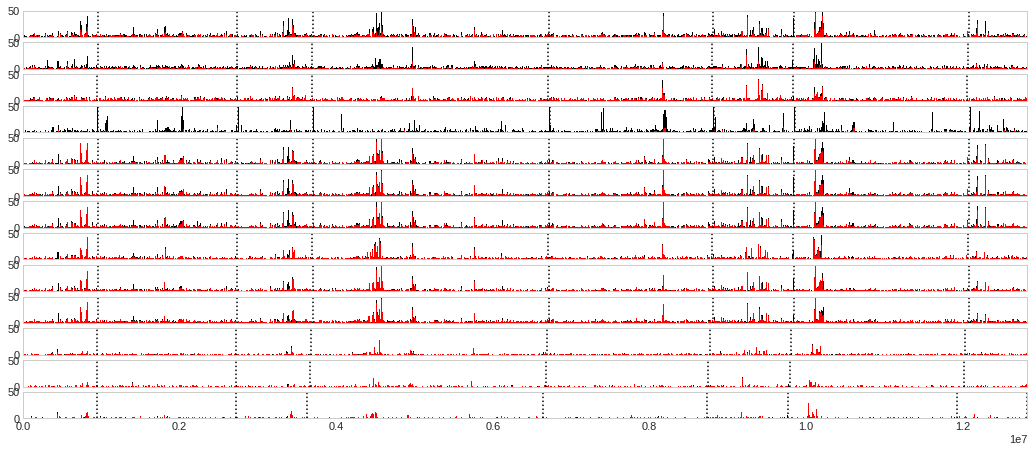

In [19]:
chr_merged_subplot(files, 50)
plt.gcf().set_size_inches(18,7.5)
plt.savefig('parapsilosis_chr_merged_2strain.pdf')
plt.show

In [24]:
files = []
GA1_iso = parse_vcf("/data4/human/candida_sampling/ref_datasets/additional_parap_genomes/vcfs/ERR246510_vs_GCA_000982675.1_GA1.1_genomic.vcf")
GA1_C1 = parse_vcf("/data4/human/candida_sampling/ref_datasets/additional_parap_genomes/vcfs/Firek_FetalMetagenome_6_12_D_replicate1_S175_001_trim_clean.PE_vs_GCA_000982675.1_GA1.1_genomic.vcf")
GA1_N3 = parse_vcf("/data4/human/candida_sampling/ref_datasets/additional_parap_genomes/vcfs/N3_182_vs_GCA_000982675.1_GA1.1_genomic.vcf")
GA1_S2 = parse_vcf("/data4/human/candida_sampling/ref_datasets/additional_parap_genomes/vcfs/S2_005_002_R2.PE.no_human_trim_clean.PE_vs_GCA_000982675.1_GA1.1_genomic.vcf")
GA1_sub = parse_vcf("/data4/human/candida_sampling/ref_datasets/additional_parap_genomes/vcfs/subway_vs_GCA_000982675.1_GA1.1_genomic.vcf")

CBS6318_iso = parse_vcf("/data4/human/candida_sampling/ref_datasets/additional_parap_genomes/vcfs/ERR246510_vs_GCA_000982555.2_CBS6318.1_genomic.vcf")
CBS6318_C1 = parse_vcf("/data4/human/candida_sampling/ref_datasets/additional_parap_genomes/vcfs/Firek_FetalMetagenome_6_12_D_replicate1_S175_001_trim_clean.PE_vs_GCA_000982555.2_CBS6318.1_genomic.vcf")
CBS6318_N3 = parse_vcf("/data4/human/candida_sampling/ref_datasets/additional_parap_genomes/vcfs/N3_182_vs_GCA_000982555.2_CBS6318.1_genomic.vcf")
CBS6318_S2 = parse_vcf("/data4/human/candida_sampling/ref_datasets/additional_parap_genomes/vcfs/S2_005_002_R2.PE.no_human_trim_clean.PE_vs_GCA_000982555.2_CBS6318.1_genomic.vcf")
CBS6318_sub = parse_vcf("/data4/human/candida_sampling/ref_datasets/additional_parap_genomes/vcfs/subway_vs_GCA_000982555.2_CBS6318.1_genomic.vcf")

CBS1954_iso = parse_vcf("/data4/human/candida_sampling/ref_datasets/additional_parap_genomes/vcfs/ERR246510_vs_GCA_900004165.1_CBS1954.1_genomic.vcf")
CBS1954_C1 = parse_vcf("/data4/human/candida_sampling/ref_datasets/additional_parap_genomes/vcfs/Firek_FetalMetagenome_6_12_D_replicate1_S175_001_trim_clean.PE_vs_GCA_900004165.1_CBS1954.1_genomic.vcf")
CBS1954_N3 = parse_vcf("/data4/human/candida_sampling/ref_datasets/additional_parap_genomes/vcfs/N3_182_vs_GCA_900004165.1_CBS1954.1_genomic.vcf")
CBS1954_S2 = parse_vcf("/data4/human/candida_sampling/ref_datasets/additional_parap_genomes/vcfs/S2_005_002_R2.PE.no_human_trim_clean.PE_vs_GCA_900004165.1_CBS1954.1_genomic.vcf")
CBS1954_sub = parse_vcf("/data4/human/candida_sampling/ref_datasets/additional_parap_genomes/vcfs/subway_vs_GCA_900004165.1_CBS1954.1_genomic.vcf")


# files = [GA1_iso, GA1_C1, GA1_N3, GA1_S2, GA1_sub, CBS6318_iso, CBS6318_C1, CBS6318_N3, CBS6318_S2, CBS6318_sub, CBS1954_iso, CBS1954_C1, CBS1954_N3, CBS1954_S2, CBS1954_sub]


## Plot with multiple references genomes used for calling SNPs for each strain 

In [27]:
files = [GA1_iso, GA1_S2, GA1_N3, GA1_C1, GA1_sub, CBS6318_iso, CBS6318_S2, CBS6318_N3, CBS6318_C1, CBS6318_sub, CBS1954_iso, CBS1954_S2, CBS1954_N3, CBS1954_C1, CBS1954_sub, isolate, S2_005_002R2, N3_182_000G1, C1_006_012G1, subway]


<function matplotlib.pyplot.show>

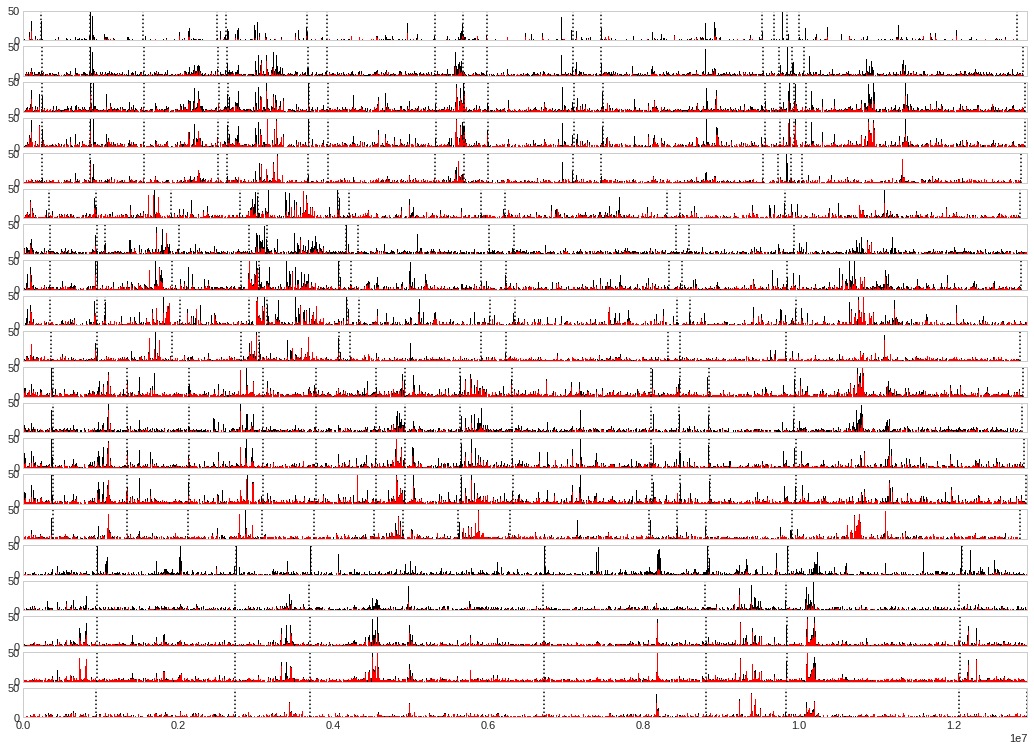

In [28]:
chr_merged_subplot(files, 50)
plt.gcf().set_size_inches(18,13)
plt.savefig('parapsilosis_chr_merged_alt_ref.pdf')
plt.show

## Plot with single reference genome for simplicity

In [63]:
files = [isolate, S2_005_002R2, N3_182_000G1, C1_006_012G1, CBS1954, CBS6318, subway]

<function matplotlib.pyplot.show>

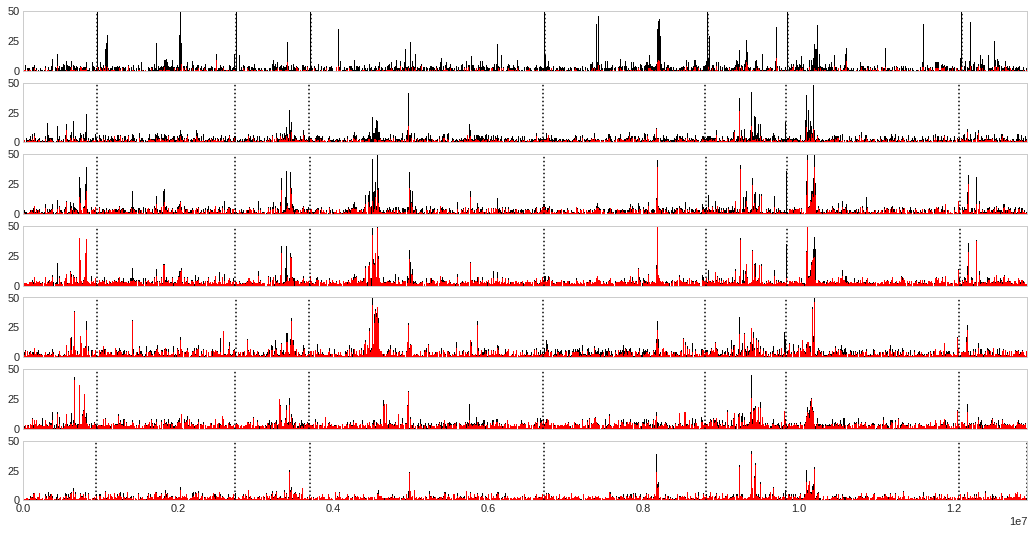

In [64]:
chr_merged_subplot(files, 50)
plt.gcf().set_size_inches(18,9)
plt.savefig('parapsilosis_chr_merged_alt_ref.pdf')
plt.show